In [1]:
from lib import Augmentation_methods
from lib import data_preparation

import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np

2022-12-12 18:14:04.783402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def plot_augmented(data, augmented_data, orig_label, aug_label):
    fig,(ax1,ax2)=plt.subplots(2)
    ax1.plot(data,'tab:orange', label = orig_label)
    ax1.axis([0,16000,600,1500])
    l1 = ax1.legend();
    ax2.plot(augmented_data,'tab:orange', label = aug_label)
    ax2.axis([0,16000,600,1500])
    l2 = ax2.legend();

## Load Dummy Data

In [3]:
dummy_lab_data = data_preparation.fake_lab_data()


/home/ing2146/Final/SNEHA/lib/data_preparation.py:202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  All_Events_Data = np.array(All_Events_Data)[shuffler]
/home/ing2146/Final/SNEHA/lib/data_preparation.py:226: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_fake_dummy_Data = np.array(df_fake_dummy_Data)


In [4]:
dummy = dummy_lab_data[0][0]

In [5]:
dummy

array([1028., 1030., 1028., ..., 1032., 1030., 1028.])

# Traditional Augmentation methods

## 1. Jittering

In [6]:
Noise_dummy = Augmentation_methods.add_white_noise(dummy, 0.50)

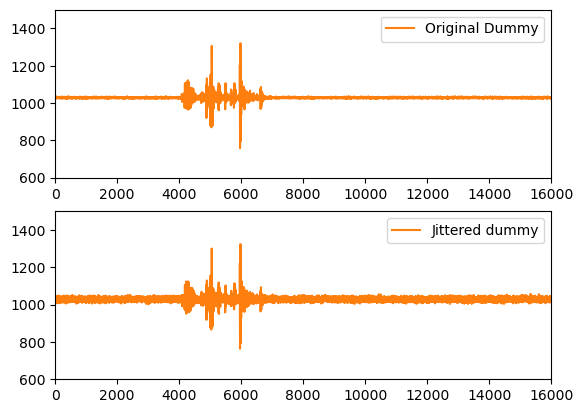

In [7]:
plot_augmented(dummy,Noise_dummy,orig_label = "Original Dummy", aug_label= "Jittered dummy" )

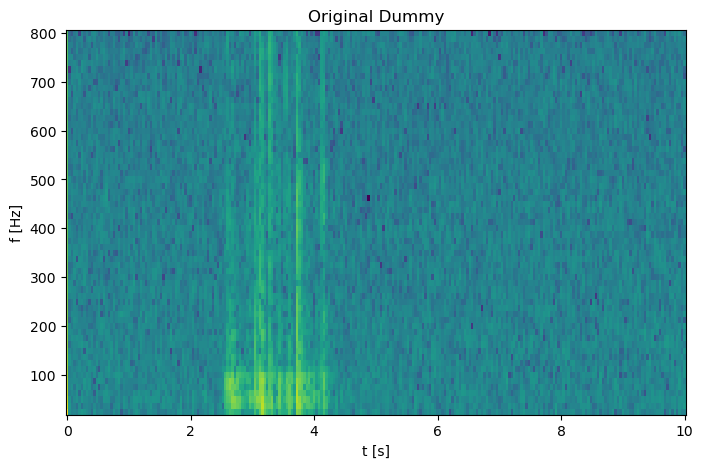

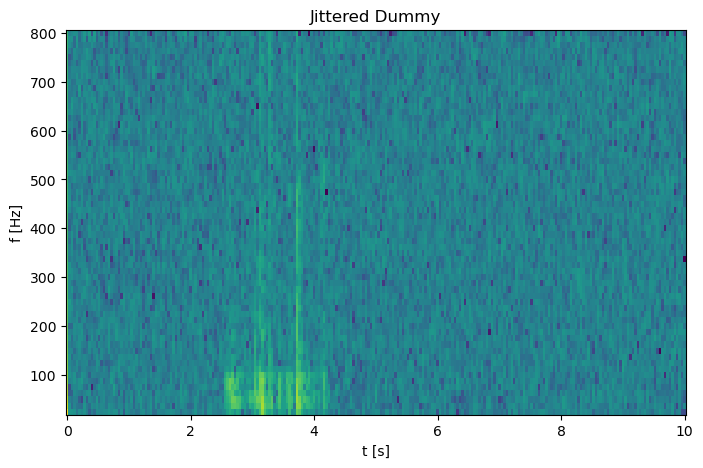

In [9]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Jittered Dummy" , data = Noise_dummy)

## 2. Magnitude warping

In [12]:
curve, magnitude_warped_dummy  =  Augmentation_methods.magnitudewarping(dummy,0.1, 6)

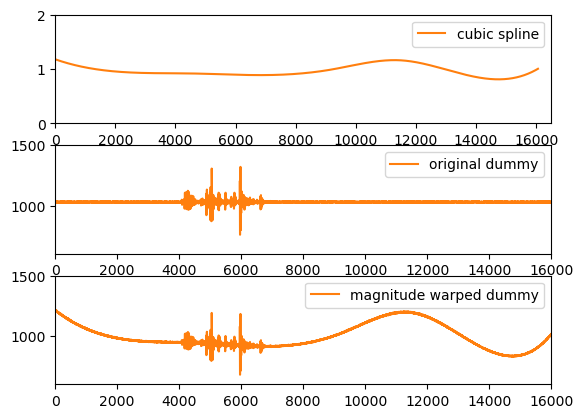

In [13]:
Augmentation_methods.plotcurve_mw(curve = curve, orig_dummy = dummy, aug_dummy = magnitude_warped_dummy, orig_label = 'original dummy', aug_label = 'magnitude warped dummy')

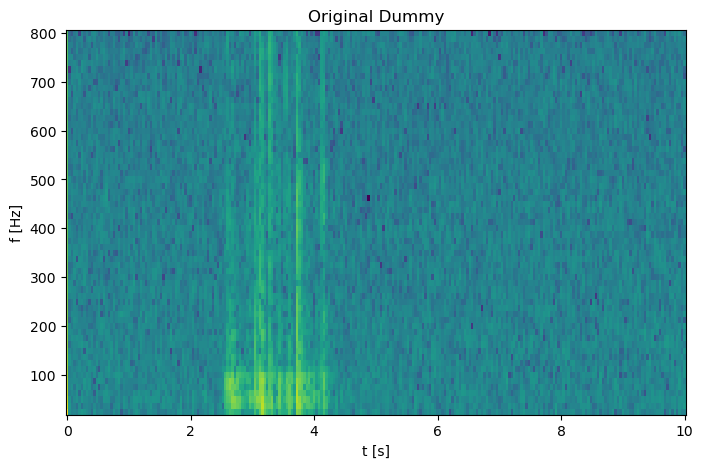

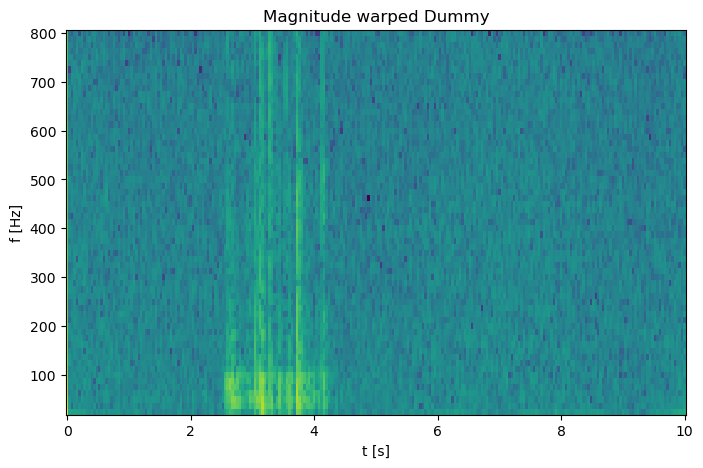

In [14]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Magnitude warped Dummy" , data = magnitude_warped_dummy)

## 3. Time warping

In [27]:
time_curve,Time_warped_dummy, Time_warped_dummy_stft = Augmentation_methods.DA_TimeWarp(dummy, 0.3, 20)

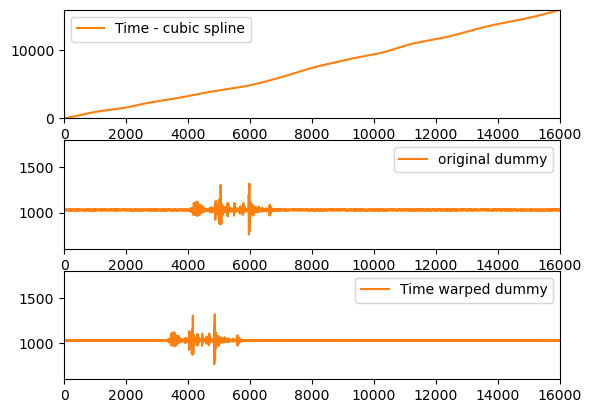

In [28]:
Augmentation_methods.plotcurve_tw(curve = time_curve, orig_dummy = dummy, aug_dummy = Time_warped_dummy,orig_label = 'original dummy', aug_label = 'Time warped dummy')

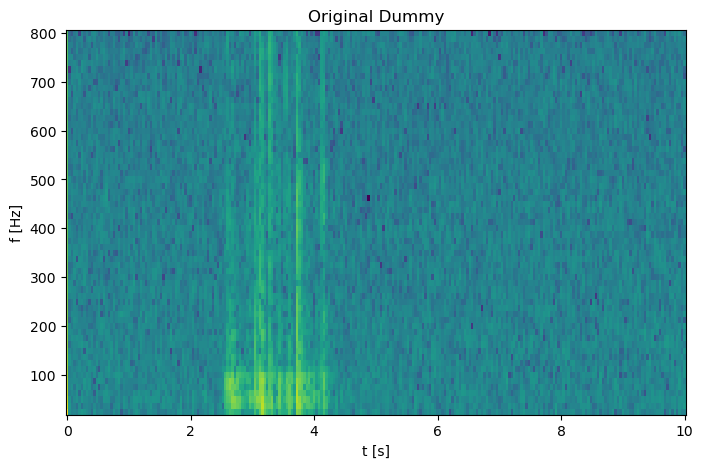

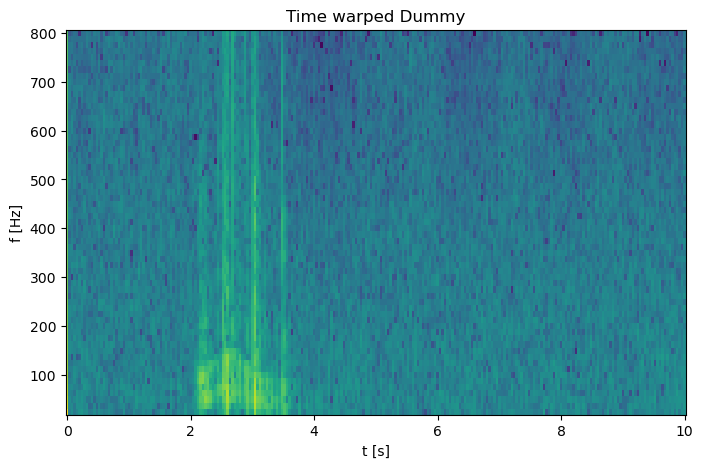

In [29]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Time warped Dummy" , data = Time_warped_dummy_stft)

## 4. Window warping

In [37]:
window_warped_dummy = Augmentation_methods.windowWarp(dummy, window_ratio=0.1, scales=[0.5, 2.])

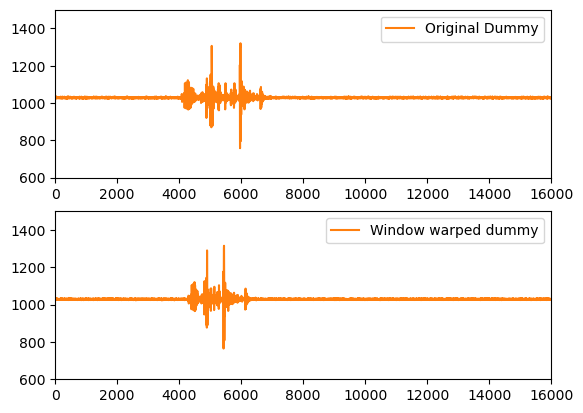

In [38]:
plot_augmented(dummy,window_warped_dummy,orig_label = "Original Dummy", aug_label= "Window warped dummy" )

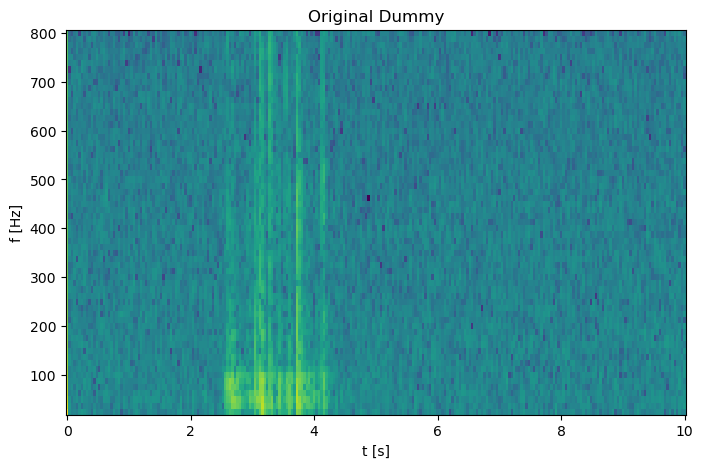

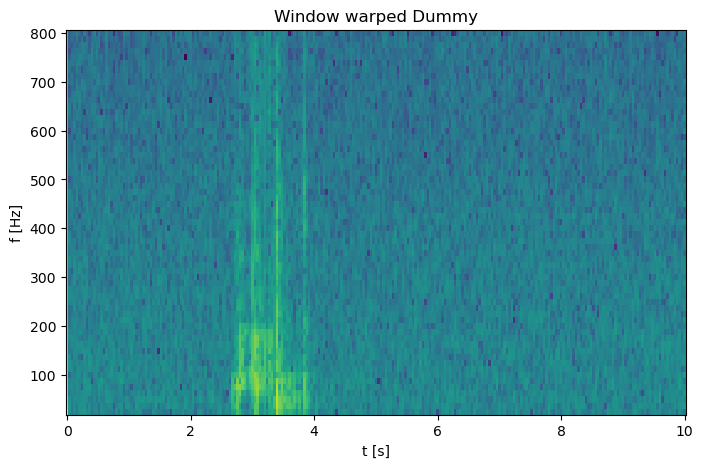

In [39]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Window warped Dummy" , data = window_warped_dummy)

## 5. Permutation

In [55]:
permutated_dummy, permutated_dummy_stft = Augmentation_methods.Permutation(dummy, nPerm=4, minSegLength=10)

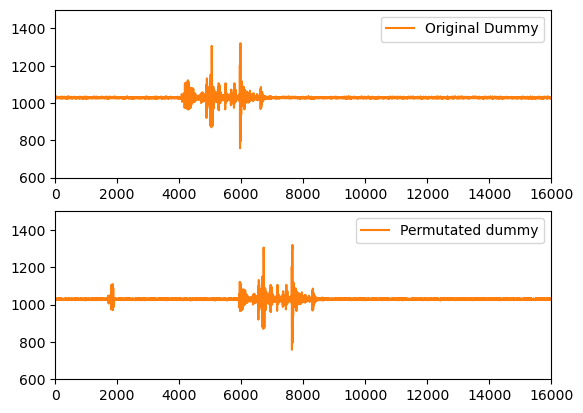

In [56]:
plot_augmented(dummy,permutated_dummy,orig_label = "Original Dummy", aug_label= "Permutated dummy" )

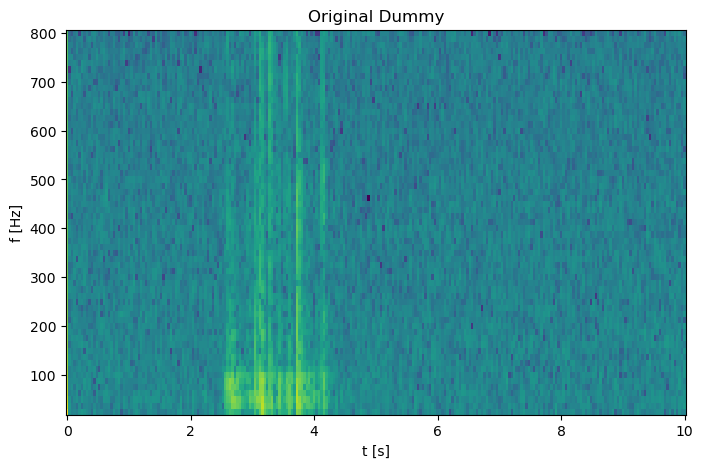

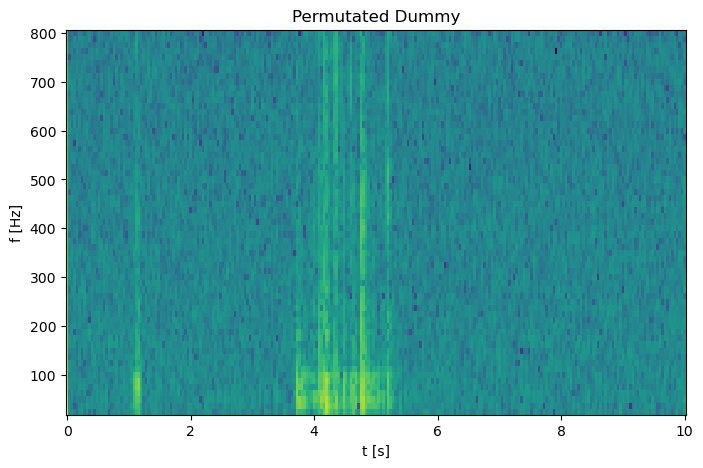

In [57]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Permutated Dummy" , data = permutated_dummy_stft)

## 6. Scaling

In [60]:
scaled_dummy = Augmentation_methods.scaling(dummy, 0.007)

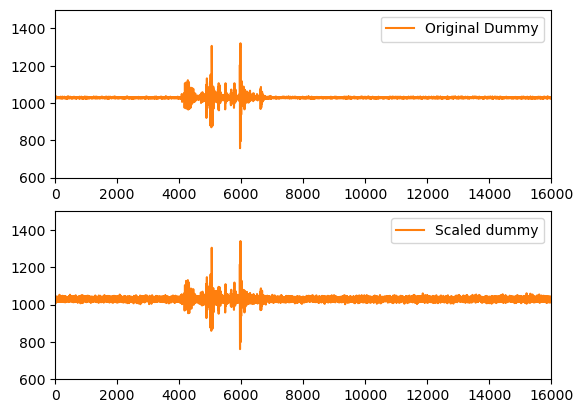

In [61]:
plot_augmented(dummy,scaled_dummy,orig_label = "Original Dummy", aug_label= "Scaled dummy" )

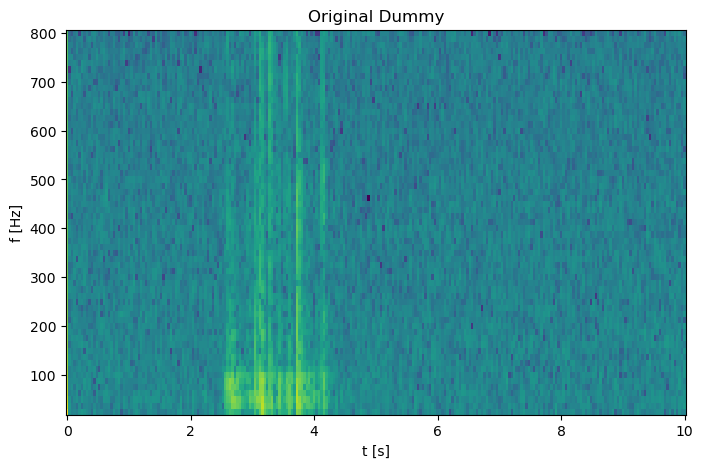

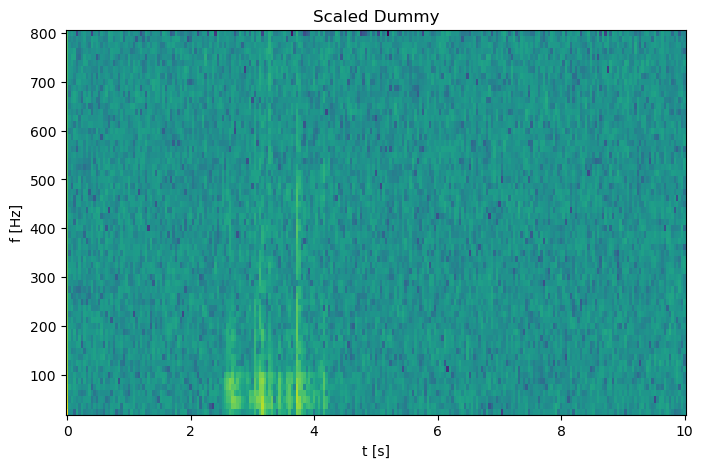

In [63]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Scaled Dummy" , data = scaled_dummy)

# Combined Traditional Augmentation methods

## 1. Jittering + Magnitude Warping

In [70]:
curve_JMW, jittered_magnitude_warped_dummy  =  Augmentation_methods.magnitudewarping((Augmentation_methods.add_white_noise(dummy, 0.50)),0.1, 6)

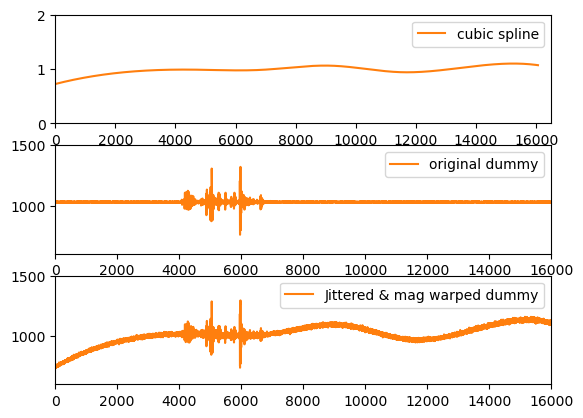

In [71]:
Augmentation_methods.plotcurve_mw(curve = curve_JMW, orig_dummy = dummy, aug_dummy = jittered_magnitude_warped_dummy,orig_label = 'original dummy', aug_label = 'Jittered & mag warped dummy')

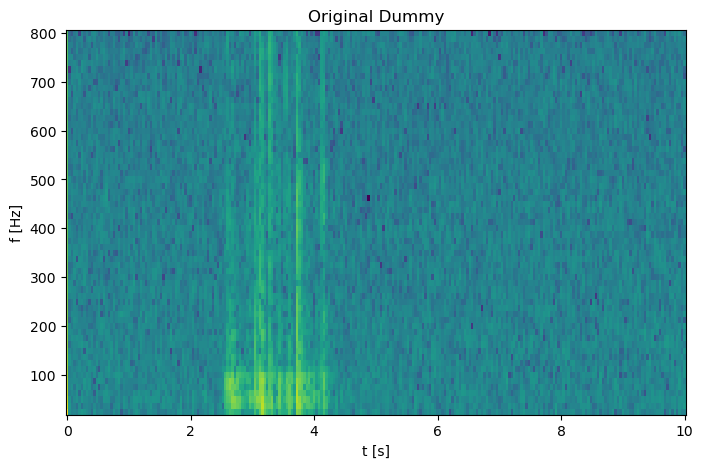

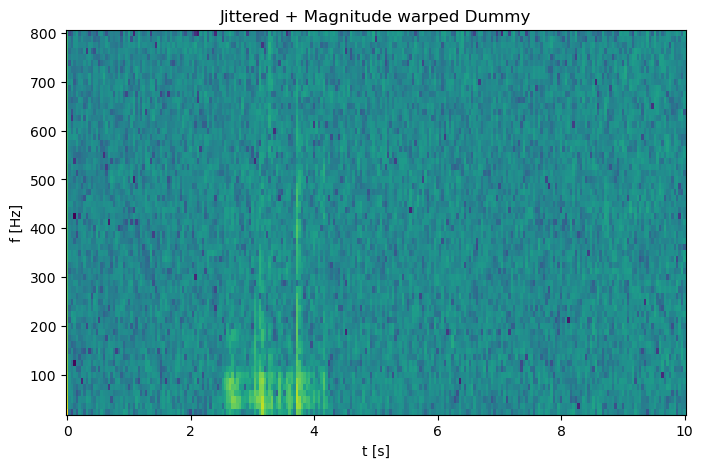

In [72]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Jittered + Magnitude warped Dummy" , data = jittered_magnitude_warped_dummy)

## 2. Jittering + Time Warping

In [75]:
jittered_time_curve,Jittered_Time_warped_dummy, Jittered_Time_warped_dummy_stft = Augmentation_methods.DA_TimeWarp((Augmentation_methods.add_white_noise(dummy, 0.50)), 0.3, 20)

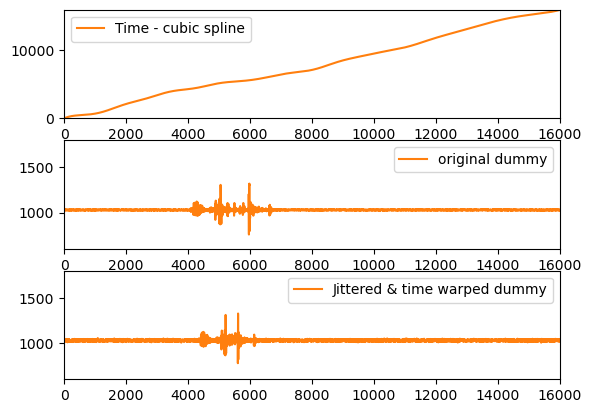

In [76]:
Augmentation_methods.plotcurve_tw(curve = jittered_time_curve, orig_dummy = dummy, aug_dummy = Jittered_Time_warped_dummy, orig_label = 'original dummy', aug_label = 'Jittered & time warped dummy')

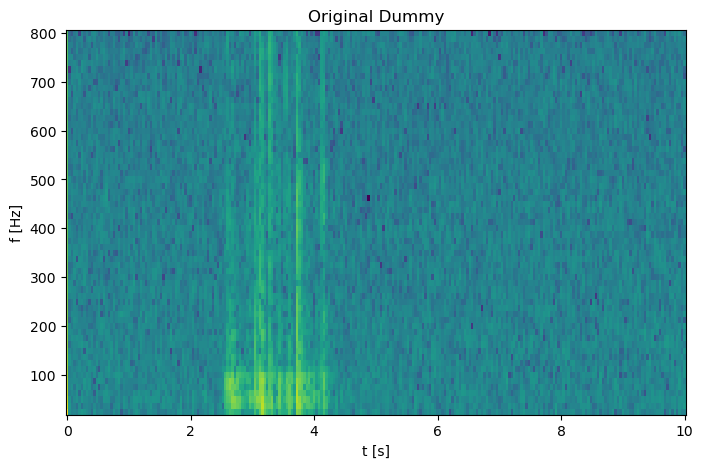

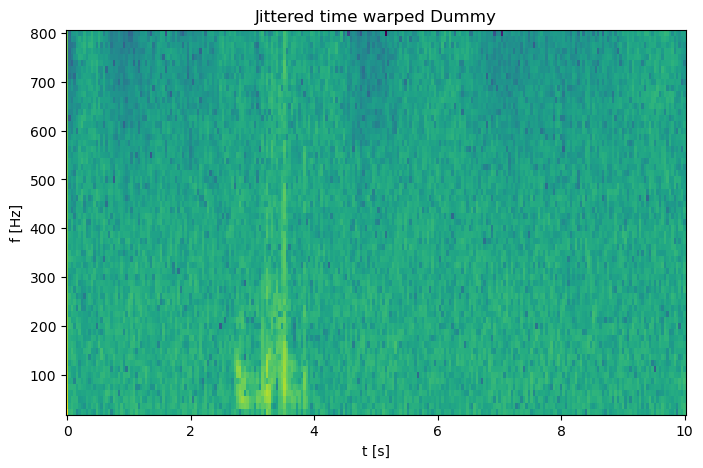

In [77]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Jittered time warped Dummy" , data = Jittered_Time_warped_dummy_stft)

## 3. Jittering + Window warping

In [82]:
Jittered_window_warped_dummy = Augmentation_methods.windowWarp((Augmentation_methods.add_white_noise(dummy, 0.50)), window_ratio=0.1, scales=[0.5, 2.])

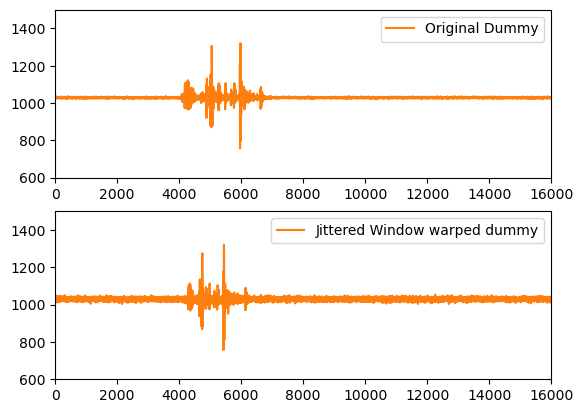

In [83]:
plot_augmented(dummy,Jittered_window_warped_dummy,orig_label = "Original Dummy", aug_label= "Jittered Window warped dummy" )

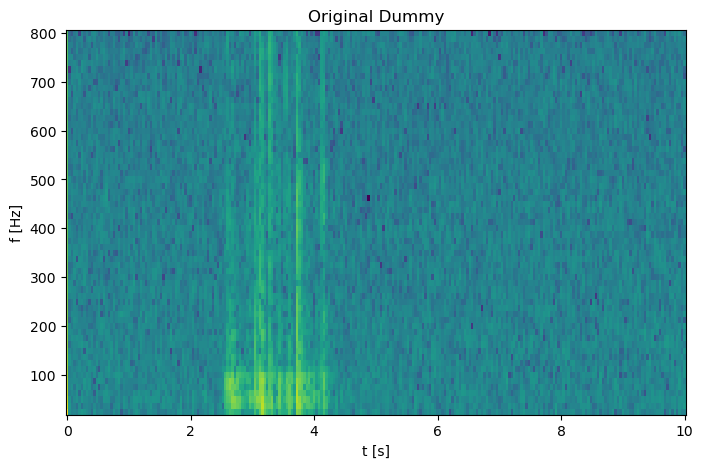

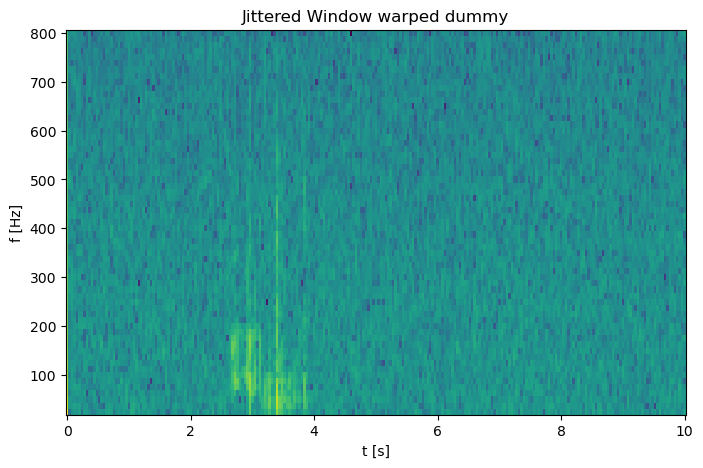

In [84]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "Jittered Window warped dummy" , data = Jittered_window_warped_dummy)

## 4. Magnitude and window warped 

In [91]:
mag_warped  =  Augmentation_methods.magnitudewarping(dummy,0.1, 6)

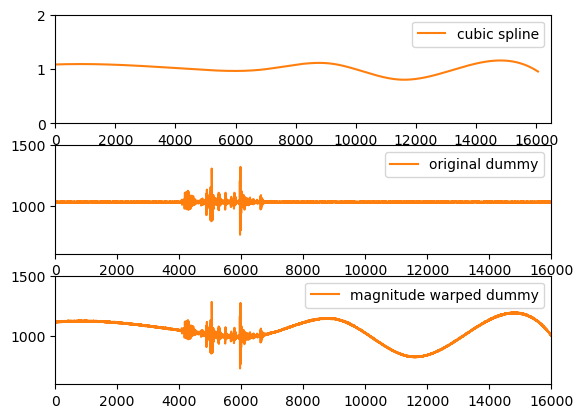

In [92]:
Augmentation_methods.plotcurve_mw(curve = mag_warped[0], orig_dummy = dummy, aug_dummy = mag_warped[1], orig_label = 'original dummy', aug_label = 'magnitude warped dummy')

In [93]:
 mag_window_warped_dummy = Augmentation_methods.windowWarp(mag_warped[1] , window_ratio=0.1, scales=[0.5, 2.])

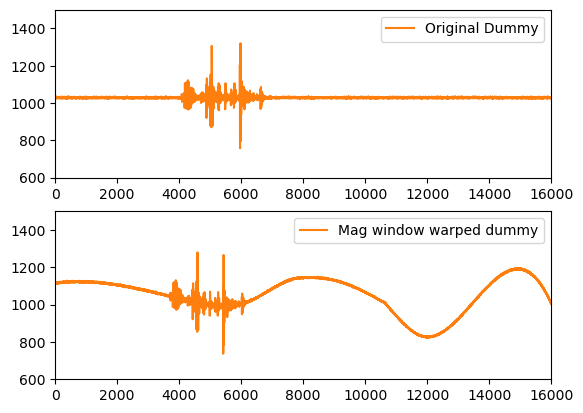

In [94]:
 plot_augmented(dummy,mag_window_warped_dummy,orig_label = "Original Dummy", aug_label= "Mag window warped dummy" )

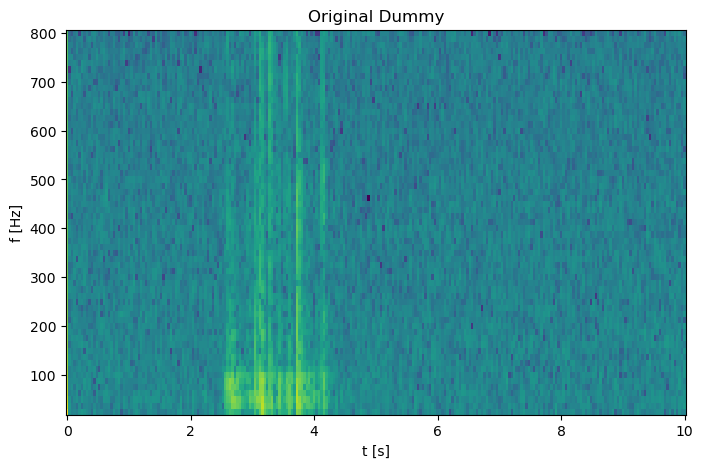

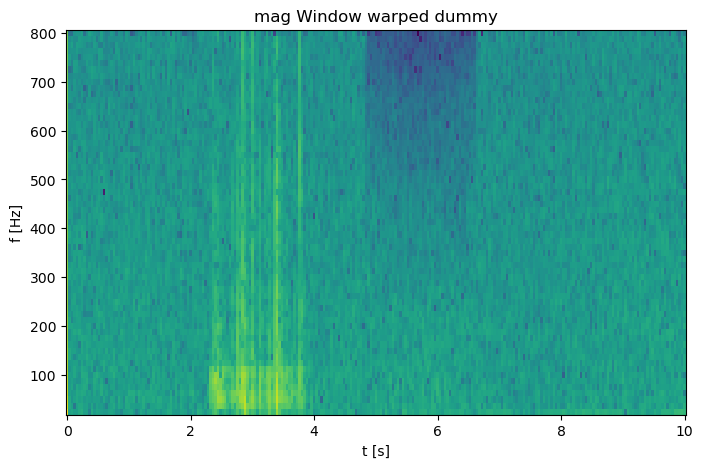

In [95]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "mag Window warped dummy" , data = mag_window_warped_dummy)

## 5. Time and window warped 

In [108]:
#time_curve,Time_warped_dummy, Time_warped_dummy_stft = DA_TimeWarp(dummy, 0.3, 4)
t_warped = Augmentation_methods.DA_TimeWarp(dummy, 0.3, 20)

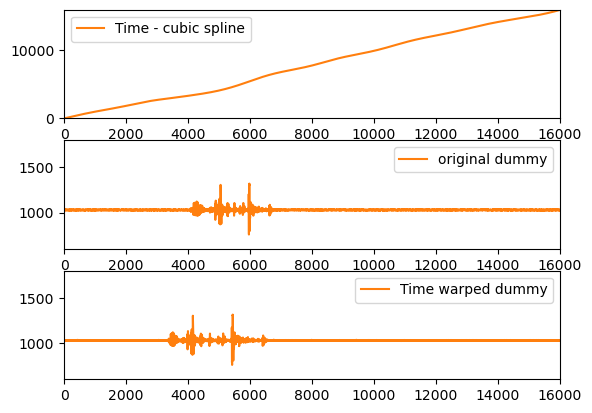

In [109]:
Augmentation_methods.plotcurve_tw(curve = t_warped[0], orig_dummy = dummy, aug_dummy = t_warped[1],orig_label = 'original dummy', aug_label = 'Time warped dummy')

In [110]:
time_window_warped_dummy = Augmentation_methods.windowWarp(t_warped[2] , window_ratio=0.1, scales=[0.5, 2.])

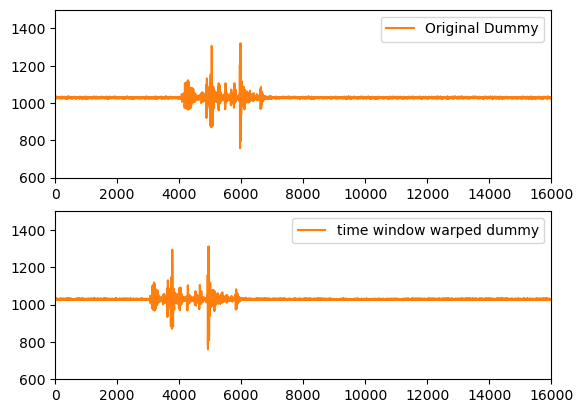

In [111]:
plot_augmented(dummy,time_window_warped_dummy,orig_label = "Original Dummy", aug_label= "time window warped dummy" )

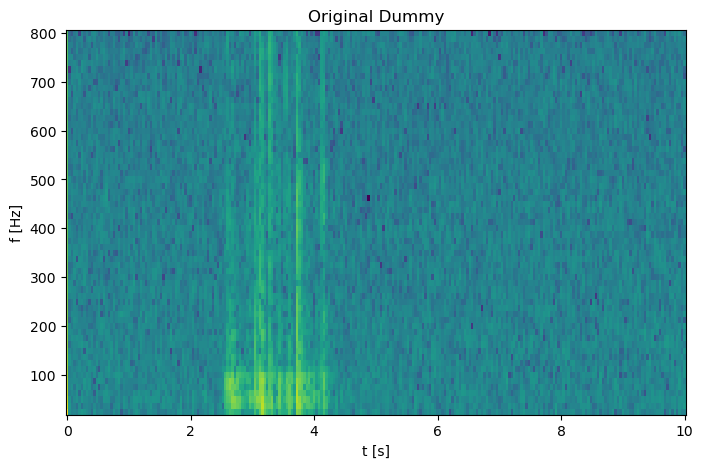

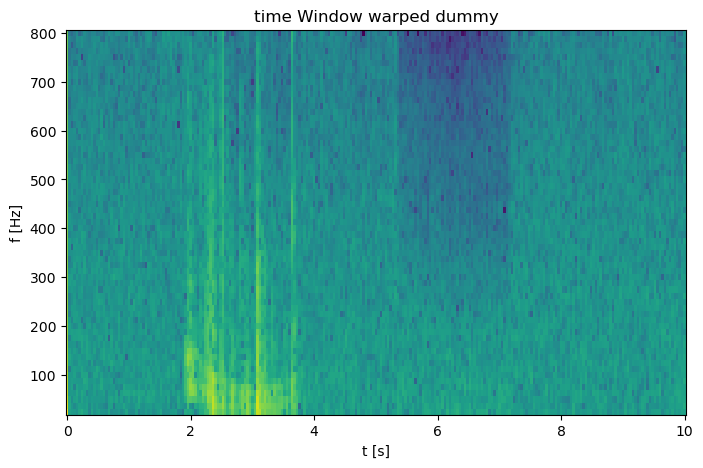

In [112]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "time Window warped dummy" , data = time_window_warped_dummy)

## 6. Scaling and magnitude warping

In [114]:
curve_SMW, scaled_magnitude_warped_dummy = Augmentation_methods.magnitudewarping((Augmentation_methods.scaling(dummy, 0.007)),0.1, 6)

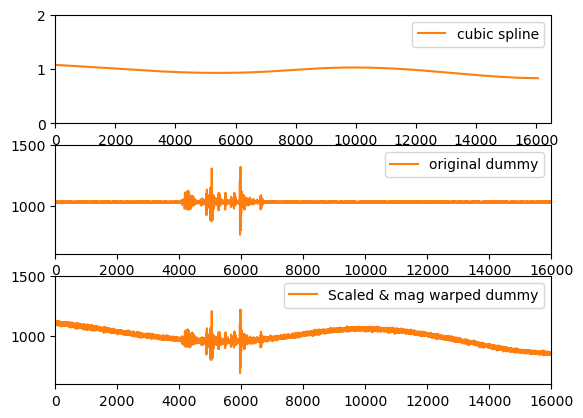

In [115]:
Augmentation_methods.plotcurve_mw(curve = curve_SMW, orig_dummy = dummy, aug_dummy = scaled_magnitude_warped_dummy,orig_label = 'original dummy', aug_label = 'Scaled & mag warped dummy')

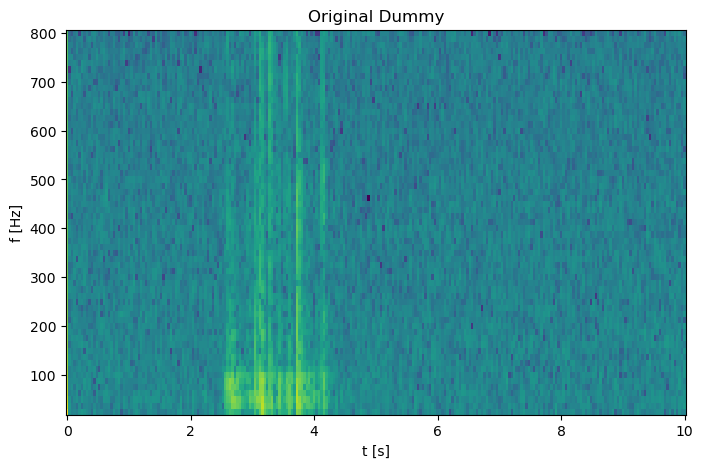

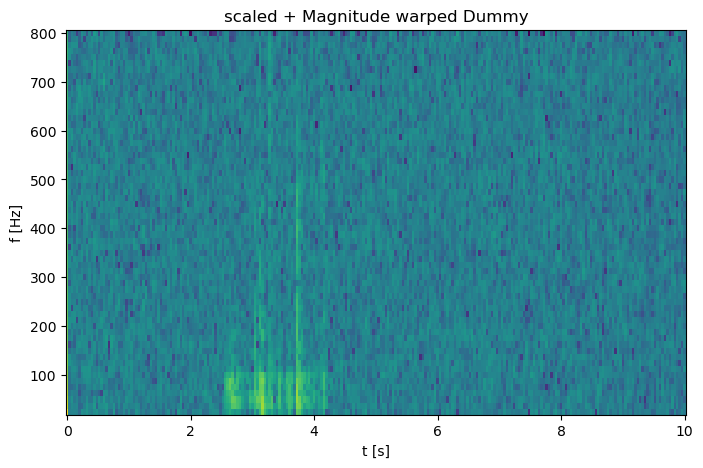

In [116]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "scaled + Magnitude warped Dummy" , data = scaled_magnitude_warped_dummy)

## 7. Scaling and time warping

In [118]:
scaled_time_curve,scaled_Time_warped_dummy, scaled_Time_warped_dummy_stft = Augmentation_methods.DA_TimeWarp((Augmentation_methods.scaling(dummy, 0.007)), 0.3, 20)

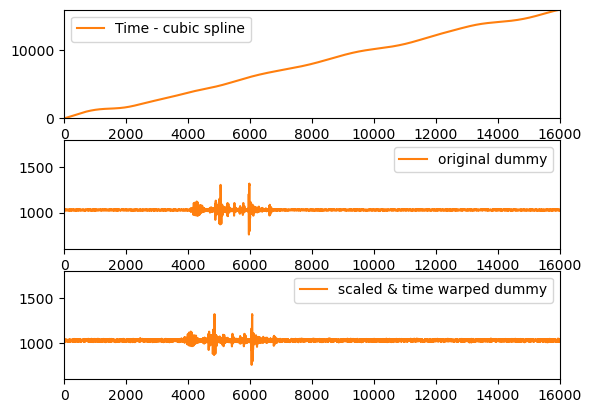

In [119]:
Augmentation_methods.plotcurve_tw(curve = scaled_time_curve, orig_dummy = dummy, aug_dummy = scaled_Time_warped_dummy, orig_label = 'original dummy', aug_label = 'scaled & time warped dummy')

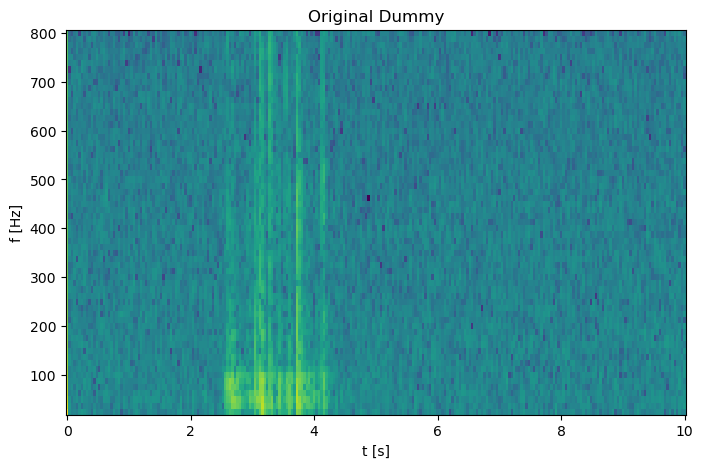

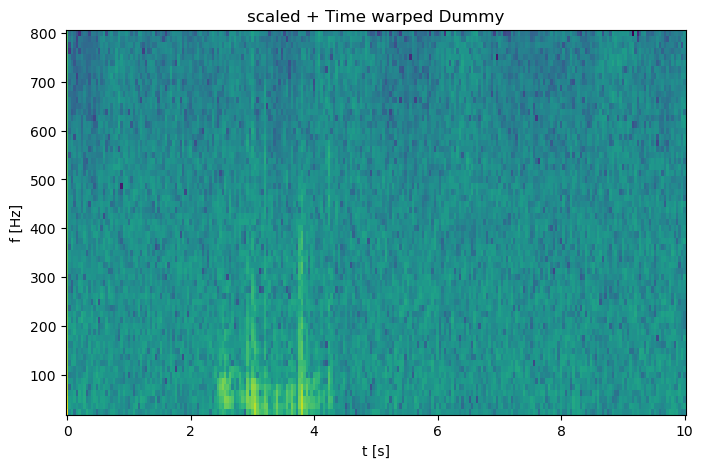

In [120]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "scaled + Time warped Dummy" , data = scaled_Time_warped_dummy_stft)

## 8. Scaling and window warping

In [123]:
scaled_window_warped_dummy = Augmentation_methods.windowWarp((Augmentation_methods.scaling(dummy, 0.007)), window_ratio=0.1, scales=[0.5, 2.])

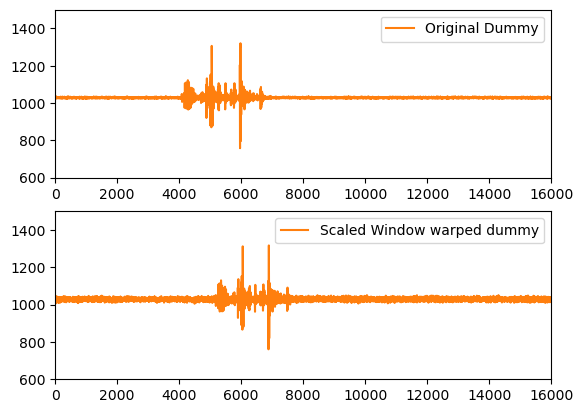

In [124]:
plot_augmented(dummy,scaled_window_warped_dummy,orig_label = "Original Dummy", aug_label= "Scaled Window warped dummy")

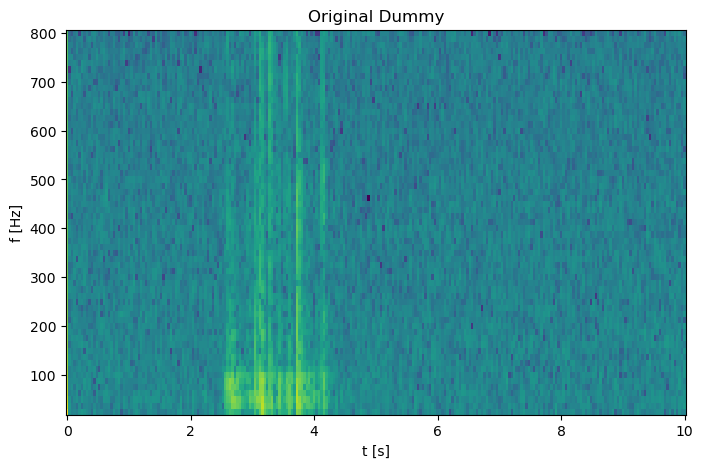

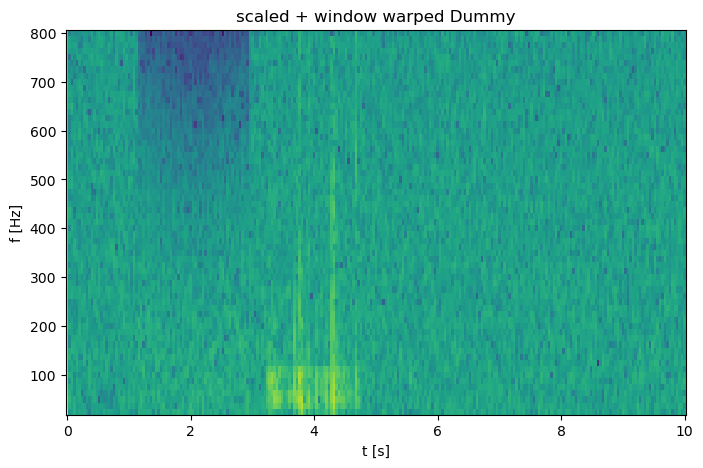

In [125]:
data_preparation.stft_plot(label = "Original Dummy" , data = dummy)
data_preparation.stft_plot(label = "scaled + window warped Dummy" , data = scaled_window_warped_dummy)